#  Stress Level Prediction with Machine Learning

## Problem Statement

The goal of this project is to predict the **stress level** of individuals based on behavioral, physiological, and lifestyle features. Accurate predictions can help improve mental health and guide preventive strategies.


In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append("./src/utils")

from bootcampviztools import (
    pinta_distribucion_categoricas,
    plot_grouped_boxplots,
    plot_grouped_histograms,
    grafico_dispersion_con_correlacion,
    plot_combined_graphs
)

## Data Extraction

As I explained in the README, all the data has been extracted from the Kaggle profile of [Laksika Tharmalingam]([https://www.kaggle.com/datasets/sujaykapadnis/sleep-and-mental-health-dataset](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset)).


In [14]:
df = pd.read_csv("./src/data_sample/Sleep_dataset.csv", index_col = "Person ID")

shape = df.shape
head = df.head()

info = df.info()
missing_values = df.isnull().sum()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
Index: 374 entries, 1 to 374
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 38.0+ KB


,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
count,374,374.000000,374,374.000000,374.000000,374.000000,374.000000,374,374,374.000000,374.000000,155
unique,2,NaN,11,NaN,NaN,NaN,NaN,4,25,NaN,NaN,2
top,Male,NaN,Nurse,NaN,NaN,NaN,NaN,Normal,130/85,NaN,NaN,Sleep Apnea
freq,189,NaN,73,NaN,NaN,NaN,NaN,195,99,NaN,NaN,78
mean,NaN,42.184492,NaN,7.132086,7.312834,59.171123,5.385027,NaN,NaN,70.165775,6816.844920,NaN
std,NaN,8.673133,NaN,0.795657,1.196956,20.830804,1.774526,NaN,NaN,4.135676,1617.915679,NaN
min,NaN,27.000000,NaN,5.800000,4.000000,30.000000,3.000000,NaN,NaN,65.000000,3000.000000,NaN
25%,NaN,35.250000,NaN,6.400000,6.000000,45.000000,4.000000,NaN,NaN,68.000000,5600.000000,NaN
50%,NaN,43.000000,NaN,7.200000,7.000000,60.000000,5.000000,NaN,NaN,70.000000,7000.000000,NaN
75%,NaN,50.000000,NaN,7.800000,8.000000,75.000000,7.000000,NaN,NaN,72.000000,8000.000000,NaN



We include an explanation of each feature represented in this proyect:

Dataset Columns:

Person ID: An identifier for each individual.

Gender: The gender of the person (Male/Female).

Age: The age of the person in years.

Occupation: The occupation or profession of the person.

Sleep Duration (hours): The number of hours the person sleeps per day.

Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10.

Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily.

Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.

BMI Category: The BMI category of the person (e.g., Underweight, Normal, Overweight).

Blood Pressure (systolic/diastolic): The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.

Heart Rate (bpm): The resting heart rate of the person in beats per minute.

Daily Steps: The number of steps the person takes per day.

Sleep Disorder: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).

Details about Sleep Disorder Column:

None: The individual does not exhibit any specific sleep disorder.
Insomnia: The individual experiences difficulty falling asleep or staying asleep, leading to inadequate or poor-quality sleep.
Sleep Apnea: The individual suffers from pauses in breathing during sleep, resulting in disrupted sleep patterns and potential health risks.



## Graphic Analysis

After explaining the features of the dataset, we are going to describe in a graphical way some  features giving some comments about them.  

(2,)


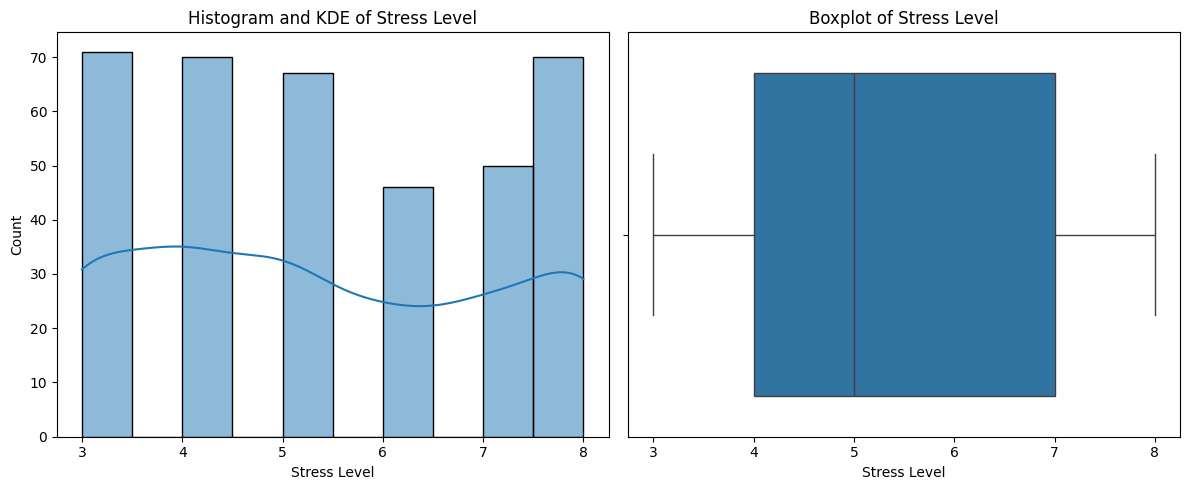

In [11]:
plot_combined_graphs(df, ["Stress Level"])

We can see that the stress level is mostly determined between the values 3 to 8 having a bit less frequences in the levels 6 and 7. With the boxplot we can see that there are not outliers to study.

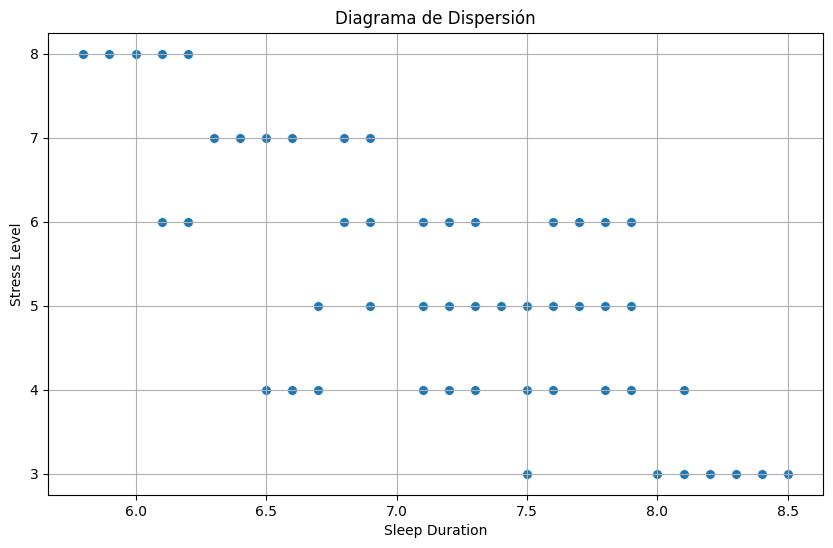

In [15]:
#For these graph we want to see the relationship between the duration of the sleep and the stress level

grafico_dispersion_con_correlacion(df, "Sleep Duration", "Stress Level")


Some conclusions that we may have after this graph could be the inverse relationship between the stress level and the sleep duration. People who sleeps between 8.0 and 8.5 hours are focused in low stress levels (3-4) whereas people who sleeps less than 6.5 hours are in stress levels between 6 and 8.

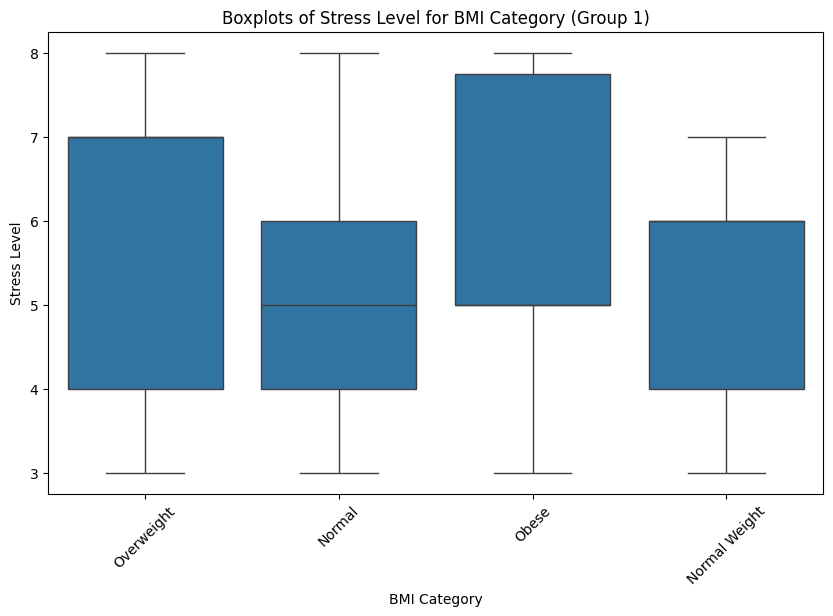

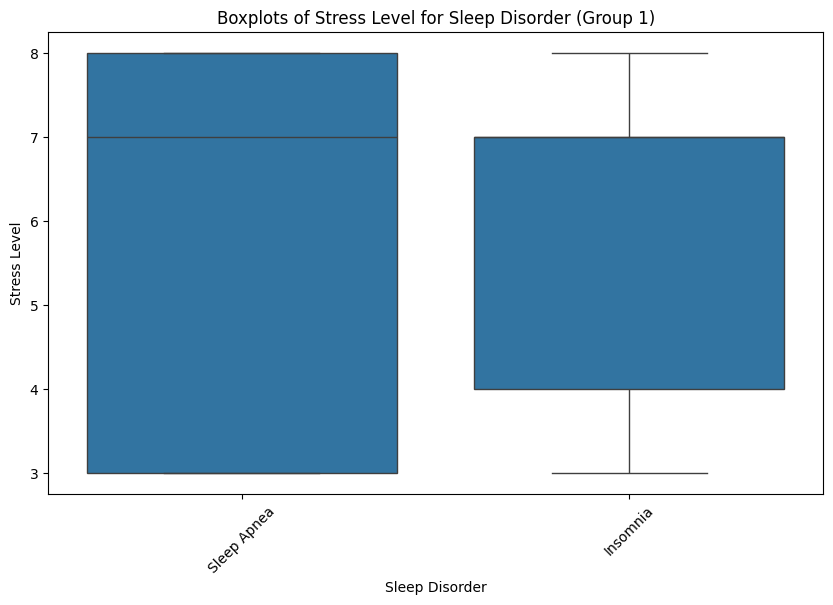

In [5]:
#We are also looking for other relationships trying to discover other aspects that may affect on this Stress Level

plot_grouped_boxplots(df, "BMI Category", "Stress Level")
plot_grouped_boxplots(df, "Sleep Disorder", "Stress Level")

We can see that people who are obese or overweight presents lightly more stress than people in standard weights.

Also, people who presents sleep apnea (sleep disorder found in people with overweight) and insomnia are also people who suffers more stress levels.

In [6]:
'''After doing a first graphic analysis with the most relevant features in my opinion,
I am going to treat those columns which I think that with some adjustment could be interesting to test
I am going to divide the features depending on their type of data they contain.
After each treatment, I am showing the results of each one in a graph in order to make it easier to understand
'''

df["Sleep Disorder"] = df["Sleep Disorder"].fillna("No Disorder")

cat_vars = df.select_dtypes(include=["object"]).columns.tolist()
num_vars = df.select_dtypes(include=["int64", "float64"]).drop(columns="Stress Level").columns.tolist()


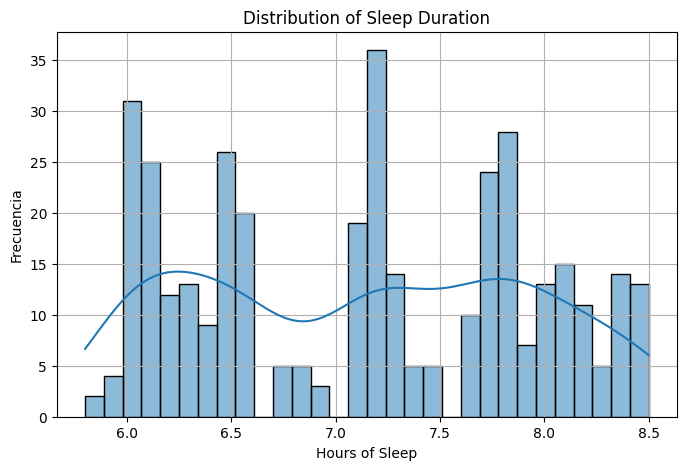

In [7]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Sleep Duration'], kde=True, bins=30)
plt.title('Distribution of Sleep Duration')
plt.xlabel('Hours of Sleep')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.savefig("sleep_duration_distribution.jpg", format="jpg", dpi=300)
plt.show()

The histogram shows a multimodal distribution of sleep duration, with several peaks around 6.0, 6.5, 7.0, 7.5, and 8.0 hours. This suggests that participants tend to cluster around certain sleep patterns, possibly due to lifestyle routines, work schedules, or biological habits.

Notably, very short or very long sleep durations are less frequent, and the data appears roughly centered between 6 and 8 hours, aligning with typical adult sleep recommendations. This variation in sleep duration could help explain different levels of stress across individuals, as previously observed in correlation analysis.

In [8]:
#Gender feature treatment
df["Gender"] = df["Gender"].map({"Male": 1, "Female": 0})

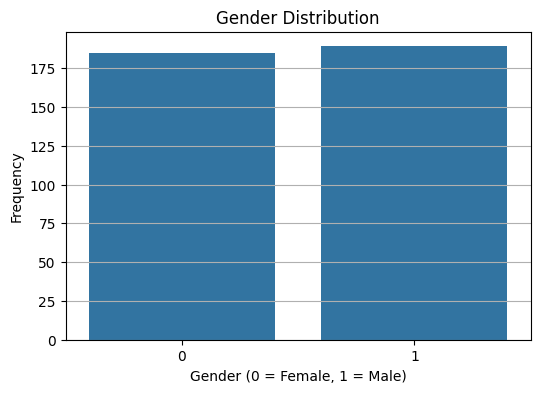

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['0', '1'])
plt.grid(True, axis='y')
plt.savefig("gender_distribution.jpg", format="jpg", dpi=300)
plt.show()

In [10]:
#Occupation feature treatment
low_freq_occupations = ["Software Engineer", "Scientist", "Sales Representative", "Manager"]
df["Occupation"] = df["Occupation"].apply(lambda x: "Other" if x in low_freq_occupations else x)
df = pd.get_dummies(df, columns=["Occupation"], drop_first=True)

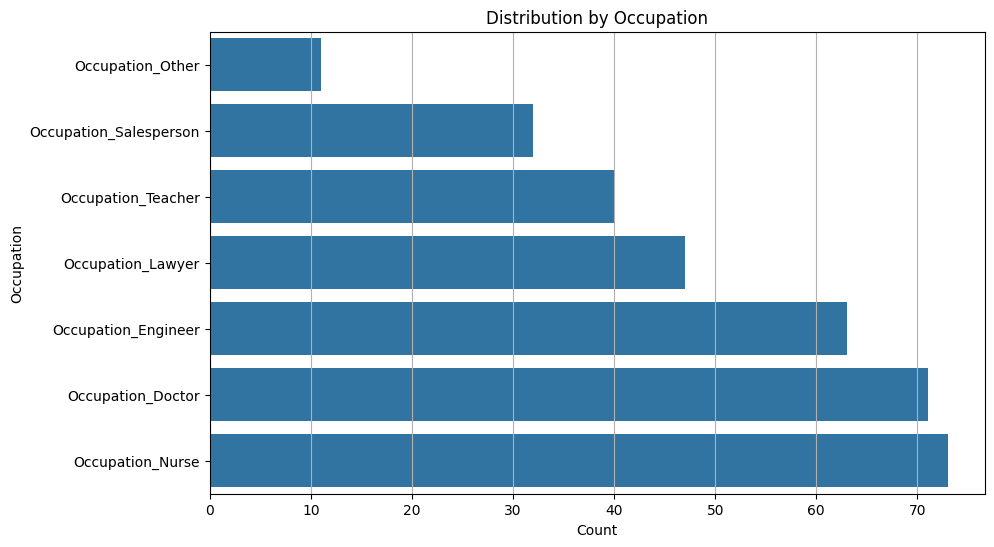

In [11]:

occupation_cols = [col for col in df.columns if col.startswith('Occupation_')]

occupation_counts = df[occupation_cols].sum().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=occupation_counts.values, y=occupation_counts.index)
plt.title('Distribution by Occupation')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.grid(True, axis='x')
plt.savefig("occupation_distribution.jpg", format="jpg", dpi=300)
plt.show()


The chart shows that the dataset is not uniformly distributed across occupations. The most represented professions are Nurses, Doctors, and Engineers, each with over 60 participants. On the other hand, categories such as Salesperson, Teacher, Lawyer, and especially Other, have significantly fewer observations.

This imbalance may influence model performance or interpretation when examining how occupation affects stress levels. However, the Kruskal-Wallis test that we are doing now will indicate that occupation has a statistically significant impact on stress, suggesting that the type of job plays a meaningful role in individuals’ stress levels.

In [12]:
#BMI Category feature treatment

bmi_mapping = {
    "Normal": 1,
    "Overweight": 2,
    "Obese": 3
}
df["BMI Category"] = df["BMI Category"].map(bmi_mapping)

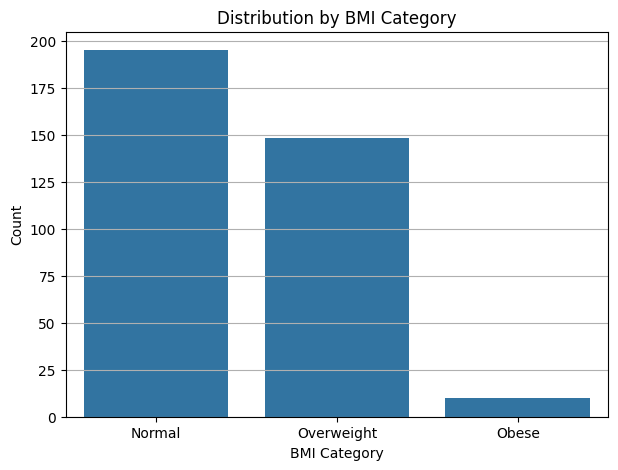

In [13]:
bmi_labels = {1: 'Normal', 2: 'Overweight', 3: 'Obese'}

plt.figure(figsize=(7, 5))
sns.countplot(x='BMI Category', data=df)
plt.title('Distribution by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=[bmi_labels[1], bmi_labels[2], bmi_labels[3]])
plt.grid(True, axis='y')
plt.savefig("bmi_category_distribution.jpg", format="jpg", dpi=300)
plt.show()

The plot shows that the majority of participants fall under the Normal and Overweight BMI categories, with a clear dominance of the Normal group. Only a small portion of the dataset is classified as Obese, which may limit the statistical power to detect strong effects for that group.

Despite this imbalance, earlier analysis indicated a relevant association between BMI and stress levels, with higher BMI categories tending to correlate with increased stress. This highlights the importance of maintaining a healthy weight not only for physical but also for mental well-being.

In [14]:
#Blood Pressure treatment

df[['Systolic_BP', 'Diastolic_BP']] = df['Blood Pressure'].str.split('/', expand=True).astype(float)


df.drop(columns=['Blood Pressure'], inplace=True)

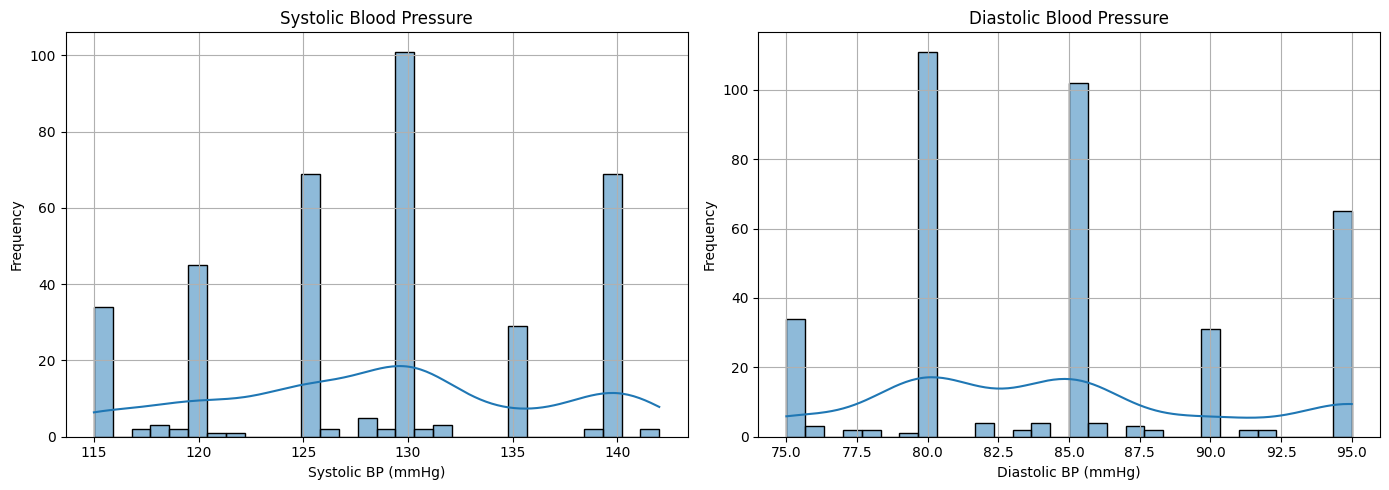

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df['Systolic_BP'], kde=True, bins=30, ax=axs[0])
axs[0].set_title('Systolic Blood Pressure')
axs[0].set_xlabel('Systolic BP (mmHg)')
axs[0].set_ylabel('Frequency')
axs[0].grid(True)

sns.histplot(df['Diastolic_BP'], kde=True, bins=30, ax=axs[1])
axs[1].set_title('Diastolic Blood Pressure')
axs[1].set_xlabel('Diastolic BP (mmHg)')
axs[1].set_ylabel('Frequency')
axs[1].grid(True)

plt.tight_layout()
plt.savefig("sys_dias_distribution.jpg", format="jpg", dpi=300)
plt.show()

In [16]:
#Sleep disorder feature treatment
df['Sleep Disorder'] = df['Sleep Disorder'].map({
    'None': 0,
    'Insomnia': 1,
    'Sleep Apnea': 2
})

For the feature Heart Rate I don't consider that any change is needed as all the values are within expected physiological ranges (65–86 bpm), normally distributed, no treatment applied.

The feature Daily Steps was also analyzed and no transformations are needed.


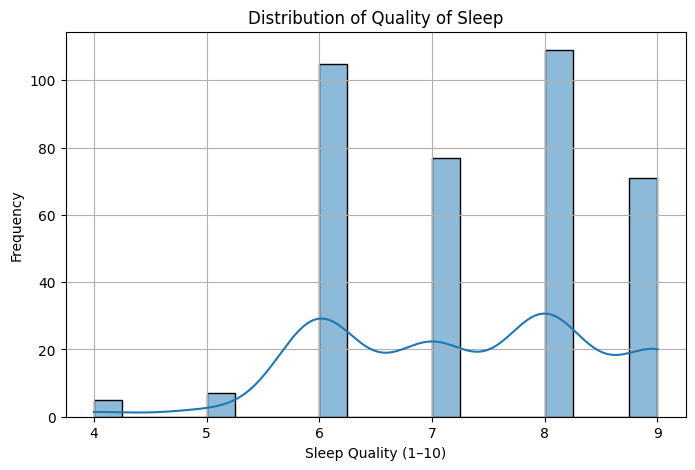

In [17]:
#For Quality of Sleep no changes were done but I consider that the graphic representation is not needed.

plt.figure(figsize=(8, 5))
sns.histplot(df['Quality of Sleep'], kde=True, bins=20)
plt.title('Distribution of Quality of Sleep')
plt.xlabel('Sleep Quality (1–10)')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig("quality_sleep_distribution.jpg", format="jpg", dpi=300)
plt.show()


The distribution of sleep quality, measured on a 1–10 scale, is concentrated mostly between 6 and 9, with clear peaks at 6 and 8, indicating that most participants report moderate to high quality sleep. Very few report sleep quality below 5, which suggests that poor sleep is underrepresented in the dataset.

As previously found in the correlation analysis, higher sleep quality is negatively associated with stress levels, meaning that individuals reporting better sleep tend to experience lower stress. This supports the model’s findings and underlines the role of sleep quality as a key factor in mental well-being.

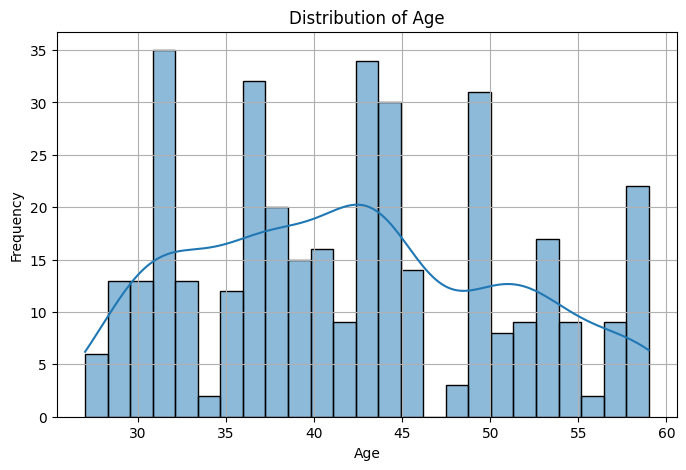

In [18]:
#Same case as Quality of Sleep for the feature Age

plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], kde=True, bins=25)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig("age_distribution.jpg", format="jpg", dpi=300)
plt.show()

In [ ]:
#We are going to divide the features depending on their type of data they contain.

y = "Stress Level"
X = df.drop(columns= y)

cat_vars = [col for col in X.columns if df[col].nunique() < 10 and col != y and df[col].dtype in ["int64", "object", "category"]]
num_vars = [col for col in X.columns if col not in cat_vars]

In [ ]:
#Now we want to know the statistical relationship between the explicative features with the target.
#For doing this we are going to try the Spearman test for the numeric features and Krustal-Wallis for the categorical ones

from scipy.stats import spearmanr, kruskal

results_num = []
results_cat = []

# Test for numerical features
for col in num_vars:
    coef, p = spearmanr(df[col], df[y])
    results_num.append({
        "Feature": col,
        "Test": "Spearman Correlation",
        "Spearman Coefficient": coef,
        "p-value": p
    })

# Test for categorical features
for col in cat_vars:
    groups = [df[df[col] == cat][y].dropna() for cat in df[col].dropna().unique()]
    if len(groups) >= 2:
        stat, p = kruskal(*groups)
        results_cat.append({
            "Variable": col,
            "Test": "Kruskal-Wallis",
            "H-statistic": stat,
            "p-value": p
        })
    else:
        print(f"The feature '{col}' does not have enough categories to be analyzed.")

numeric_df = pd.DataFrame(results_num).sort_values("p-value")
categorical_df = pd.DataFrame(results_cat).sort_values("p-value")



In [21]:
#We are using as a standard value for the numeric features a p-value of 0.05.
#We are taking as a significative feature all with a p-value under this standard value.

significant_num = numeric_df["p-value"] < 0.05
significant_num_df = numeric_df[significant_num]
significant_num_df

,Feature,Test,Spearman Coefficient,p-value
4,Heart Rate,Spearman Correlation,0.820297,2.727402e-92
1,Sleep Duration,Spearman Correlation,-0.810633,1.746532e-88
0,Age,Spearman Correlation,-0.425622,6.884534e-18
8,Occupation_Engineer,Spearman Correlation,-0.386986,8.265012e-15
7,Occupation_Doctor,Spearman Correlation,0.371429,1.115998e-13
12,Occupation_Salesperson,Spearman Correlation,0.264650,2.059781e-07
5,Daily Steps,Spearman Correlation,0.171744,8.528007e-04
13,Occupation_Teacher,Spearman Correlation,-0.161747,1.699568e-03
11,Occupation_Other,Spearman Correlation,0.127170,1.385033e-02
15,Diastolic_BP,Spearman Correlation,0.101547,4.972444e-02


In [22]:
#We are using the same standard value for the categorical features.
significant_cat = categorical_df["p-value"] < 0.05
significant_cat_df = categorical_df[significant_cat]

significant_cat_df


,Variable,Test,H-statistic,p-value
1,Quality of Sleep,Kruskal-Wallis,320.953697,3.121229e-67
0,Gender,Kruskal-Wallis,67.341114,2.283690e-16


The statistical analysis suggests that the selected features exhibit a significant non-random association with the target variable, Stress Level, indicating potential predictive value.

After this, we are going to create a new dataframe with all the features which finally seem to be important on the target and create a train test division

In [23]:

selected_features = [
    'Heart Rate', 'Sleep Duration', 'Age', 'Daily Steps', 'Diastolic_BP',
    'Occupation_Engineer', 'Occupation_Doctor', 'Occupation_Salesperson',
    'Occupation_Teacher', 'Occupation_Other',
    'Quality of Sleep', 'Gender'
]

X = df[selected_features]
y = df['Stress Level']

num_features = ['Heart Rate', 'Sleep Duration', 'Age', 'Daily Steps', 'Diastolic_BP']

## Train-Test Split

After completing all feature preprocessing and statistical analysis, we split the updated dataset — which includes only the features identified as relevant — into training and test sets. This split allows us to train a machine learning model that can learn to predict individual stress levels and then evaluate its performance on unseen data. In this main notebook you are only going to see the best model found. In the notebooks folder you can see similar notebooks with a modification on the model used with other not-optimized ones.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[num_features] = scaler.fit_transform(X_train[num_features])
X_test_scaled[num_features] = scaler.transform(X_test[num_features])

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 4, 5, 7, 10, 15, 17, 20],
    'min_samples_split': [3, 5, 7, 10],
    'min_samples_leaf': [3, 5, 7, 10],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(
    estimator= rf_model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
print("Mejores hiperparámetros:", grid_search.best_params_)

# Train and test evaluation
y_train_pred_best = best_rf.predict(X_train)
y_test_pred_best = best_rf.predict(X_test)

mae_train_best = mean_absolute_error(y_train, y_train_pred_best)
rmse_train_best = np.sqrt(mean_squared_error(y_train, y_train_pred_best))
r2_train_best = r2_score(y_train, y_train_pred_best)

mae_test_best = mean_absolute_error(y_test, y_test_pred_best)
rmse_test_best = np.sqrt(mean_squared_error(y_test, y_test_pred_best))
r2_test_best = r2_score(y_test, y_test_pred_best)

print(f"Train - MAE: {mae_train_best:.4f}, RMSE: {rmse_train_best:.4f}, R²: {r2_train_best:.4f}")
print(f"Test  - MAE: {mae_test_best:.4f}, RMSE: {rmse_test_best:.4f}, R²: {r2_test_best:.4f}")

In [35]:
print(f"Train - MAE: {mae_train_best:.4f}, RMSE: {rmse_train_best:.4f}, R²: {r2_train_best:.4f}")
print(f"Test  - MAE: {mae_test_best:.4f}, RMSE: {rmse_test_best:.4f}, R²: {r2_test_best:.4f}")

Train - MAE: 0.1170, RMSE: 0.2647, R²: 0.9775
Test  - MAE: 0.1171, RMSE: 0.2899, R²: 0.9731


This project aimed to develop a predictive model to estimate individuals' stress level (Stress Level), a continuous psychological variable. Several regression models were evaluated, and after hyperparameter tuning and cross-validation, the model that best balanced accuracy and generalization was a Random Forest Regressor.

In this model, we have a high precision in stress prediction. The model can accurately estimate an individual’s stress level based on variables such as sleep duration, physical activity, BMI, occupation, etc. This could be valuable in clinical, occupational, or preventive health contexts.

Thanks to techniques such as cross-validation and regularization (such as limiting tree depth and minimum samples per leaf), the model achieves a strong balance between accuracy and simplicity, minimizing overfitting.

## Model saved
Now we are saving the best model in the models folder

In [37]:
import joblib

joblib.dump(rf_model, 'best_rf_model.joblib')


['best_rf_model.joblib']

##  Final Conclusions

This project focused on developing a machine learning model to **predict individual stress levels** (`Stress Level`) using behavioral, physiological, and lifestyle-related variables. After evaluating several regression models and performing extensive hyperparameter tuning and cross-validation, a **Random Forest Regressor** emerged as the most balanced and robust choice.

### Model Performance Summary

- **R² on test set**: 0.9731 — the model explains **97.31% of the variance** in stress levels on unseen data.
- **MAE (Mean Absolute Error)** on test: 0.1171 — predictions deviate by only ~0.12 units on average.
- Minimal difference between train and test metrics → **strong generalization** and low overfitting risk.

###  Implications

- The model can **reliably predict stress levels** using features like sleep duration, physical activity level, BMI, occupation, and more.
- Its predictions enable **personalized stress assessments**, useful for healthcare, workplace well-being programs, or personal monitoring.
- Through regularization and validation, the model achieves both **accuracy and robustness**, making it suitable for real-world application.

###  Insights from Correlation and Statistical Testing

Before modeling, we conducted **correlation tests** (Spearman) and **non-parametric group comparisons** (Kruskal-Wallis) to explore the relationships between features and stress level.

- **Sleep Duration**, **Physical Activity**, and **Quality of Sleep** showed strong **negative correlations** with stress — meaning that lower values in these features are associated with higher stress.
- Categorical variables like **Occupation** and **Sleep Disorder** showed statistically significant differences in stress levels according to the **Kruskal-Wallis test**, confirming their impact on stress variability across groups.

These results informed both feature selection and interpretation, strengthening the model’s practical relevance.

###  Practical Relevance

In addition to building a predictive model, the project provided **insight into the daily factors that most affect stress**. Variables such as **sleep duration**, **physical activity**, and **BMI** showed the highest correlations with stress levels. This reinforces the importance of these lifestyle factors not only as predictors but also as **actionable levers** for stress management.

This means that beyond the model’s predictive capabilities, it offers **practical guidance**: by actively managing these variables, individuals can potentially **improve their mental health and reduce stress**. The project thus bridges the gap between data science and personal well-being, showing how informed choices can lead to a healthier lifestyle.
